Portfolio optimization in finance is the technique of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

## What does Portfolio Optimization Mean?

Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

## What does a Portfolio Mean?

An investor’s portfolio basically is his/her investment in different kinds of assets from different companies.

For example, if you have investments in 3 companies, say, X, Y, and Z, then these 3 companies make up your investment portfolio.

But how do you invest in a company? You do so by purchasing assets of that company.

## What are Assets, Returns, and Risk?

Assets are of various kinds. An asset is what you would purchase if you want to invest in a company.

These include, but are not limited to:

1. Bonds
2. Stocks
3. Cash
4. Real Estate

Usually when you build a portfolio, it is advisable to diversify your assets, or purchase different kinds of assets from different companies. For all assets, you will get a profit after a specified period of time. However, the profit may not be the same for each investment you make.

This profit is what we call returns.

For example, you will get returns from stocks when it’s market value goes up and similarly you will get returns from cash in form of interest.

But what if the company whose stocks you have purchased goes bankrupt?

This will lead to its stocks crashing in the share market and instead of gaining profits, you will also lose your capital investment.

This is what is called risk of investment.

Another aspect of risk is the fluctuations in the asset value. For certain assets, its value is highly volatile, that is, the value increases when the market goes up, and drops accordingly. Whereas certain other assets, like bonds and certain steady stocks, are relatively more resistant to market conditions, but may give lesser returns compared to high risk ones.

A good portfolio is one which gives us maximum return on our investment for minimum risk, as discussed earlier.

The next question is, how do we decide out of an infinite possible combinations for portfolios, the one which is optimum?

## Modern Portfolio Theory

Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

It was formulated by H. Markowitz and while it is not the only optimization technique known, it is the most widely used.

MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.

So, what is the MPT all about?

MPT encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

This is the crux of the Modern Portfolio Theory.

## What is Efficient Frontier?

We know every asset in a portfolio has its own rate expected returns and risks. It is possible to create multiple combinations of assets that can provide high returns for a pre-defined risk level.

Likewise, there can be multiple portfolios that give lowest risk for a pre-defined expected return.

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

We will revisit this with an example again.

Now that we understand the term of portfolio optimization, let’s see how its actually implemented.

## Some Fundamental Terms in Portfolio Optimization

There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. We will go through each one through an example.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st May, 2021.

# Auto Sector Stocks Analysis

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
test = pd.read_csv('auto.csv',parse_dates=['date'], index_col=0)

As we can see, there are a lot of different columns for different prices throughout the day, but we will only focus on the ‘Close’ column. This colum gives us the closing price of company’s stock on the given day.

In [3]:
# Closing price
test.head()

,MARUTI.NS,M&M.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,HEROMOTOCO.NS,EICHERMOT.NS,BHARATFORG.NS,BALKRISIND.NS,ASHOKLEY.NS,MRF.NS
date,,,,,,,,,,
01-01-2016,4638.500000,632.674988,401.899994,2518.000000,2686.050049,1737.084961,443.850006,325.075012,88.800003,40552.14844
04-01-2016,4580.649902,621.250000,377.049988,2483.350098,2637.800049,1749.530029,435.450012,326.024994,92.000000,40505.85156
05-01-2016,4566.950195,624.599976,374.450012,2502.350098,2616.850098,1715.989990,428.725006,326.174988,93.099998,40593.25000
06-01-2016,4480.799805,613.075012,365.899994,2485.500000,2578.199951,1752.505005,438.174988,326.674988,92.699997,40419.19922
07-01-2016,4267.899902,598.724976,343.549988,2419.250000,2520.100098,1703.564941,412.325012,326.274994,91.349998,39066.25000


In [4]:
# Closing price
test.tail()

,MARUTI.NS,M&M.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,HEROMOTOCO.NS,EICHERMOT.NS,BHARATFORG.NS,BALKRISIND.NS,ASHOKLEY.NS,MRF.NS
date,,,,,,,,,,
23-12-2020,7449.950195,711.500000,169.199997,3309.649902,3040.050049,2446.699951,538.500000,1560.099976,95.199997,75854.85156
24-12-2020,7446.049805,710.900024,175.949997,3374.750000,3073.100098,2436.750000,526.599976,1555.800049,95.250000,75892.35156
28-12-2020,7483.000000,710.950012,186.350006,3414.699951,3082.600098,2451.350098,527.799988,1557.000000,95.300003,75366.70313
29-12-2020,7452.350098,707.049988,183.449997,3431.550049,3074.000000,2460.550049,523.450012,1559.550049,95.000000,75677.54688
30-12-2020,7612.899902,720.700012,184.149994,3448.149902,3101.399902,2517.350098,517.599976,1615.050049,94.800003,76925.10156


Step 2: Calculate percentage change in stock prices

Next, we calculate the percentage change in stock prices of tesla everyday. We will notice that that we take the log of percentage change.

But why take log?

The reason for this is that log of the returns is time additive.

That is,
If r13 is the returns for time between t3 and t1.
r12 is the returns between t1 and t2 and
r23 is the returns between t2 and t3.

Then, log(r13) = log(r12) + log(r23)

For example:,
If p1 = 100, p2 = 110 and p3 = 120,
where p1 is price of stock in time 1

Then:

log(r12) = ln(p2/p1) = ln(110/100) = 9.53%,

log(r23) = ln(120/110) = 8.7% and

log(r13) = log(r12) + log(r23) = 9.53 + 8.7 = 18.23%, which is same as ln(120/100).

This means a log change of +0.1 today and then -0.1 tomorrow will give you the same value of stock as yesterday. This is not true if you simply compute percentage change.

It is common practice in portfolio optimization to take log of returns for calculations of covariance and correlation.

In [5]:
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

,0
MARUTI.NS,0.313695
M&M.NS,0.317425
TATAMOTORS.NS,0.462686
BAJAJ-AUTO.NS,0.260932
HEROMOTOCO.NS,0.303701
EICHERMOT.NS,0.343142
BHARATFORG.NS,0.375139
BALKRISIND.NS,0.368046
ASHOKLEY.NS,0.445052
MRF.NS,0.274484


<Axes: xlabel='Stocks', ylabel='Volatility'>

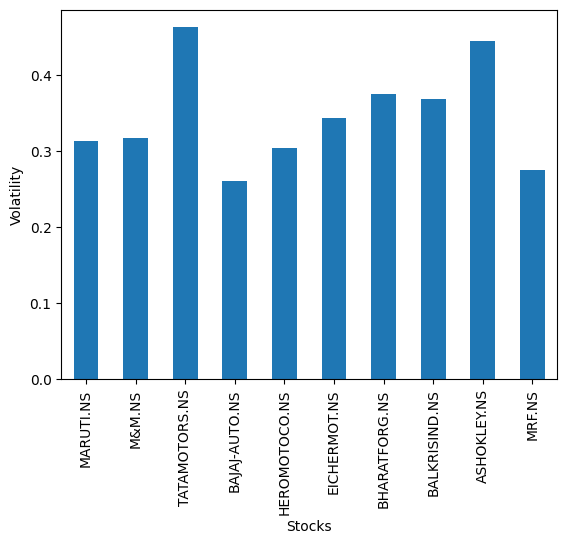

In [6]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar', xlabel="Stocks",ylabel="Volatility")

## Covariance

Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of HDFC Bank and ICICI Bank by using the .cov() function.

In [7]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

,MARUTI.NS,M&M.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,HEROMOTOCO.NS,EICHERMOT.NS,BHARATFORG.NS,BALKRISIND.NS,ASHOKLEY.NS,MRF.NS
date,,,,,,,,,,
01-01-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-01-2016,-0.012550,-0.018223,-0.063826,-0.013856,-0.018126,0.007139,-0.019107,0.002918,0.035402,-0.001142
05-01-2016,-0.002995,0.005378,-0.006919,0.007622,-0.007974,-0.019357,-0.015564,0.000460,0.011886,0.002155
06-01-2016,-0.019044,-0.018624,-0.023098,-0.006756,-0.014880,0.021056,0.021803,0.001532,-0.004306,-0.004297
07-01-2016,-0.048680,-0.023685,-0.063027,-0.027016,-0.022793,-0.028323,-0.060806,-0.001225,-0.014670,-0.034046


In [8]:
test1.cov()

,MARUTI.NS,M&M.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,HEROMOTOCO.NS,EICHERMOT.NS,BHARATFORG.NS,BALKRISIND.NS,ASHOKLEY.NS,MRF.NS
MARUTI.NS,0.000394,0.000206,0.000270,0.000164,0.000211,0.000226,0.000233,0.000193,0.000236,0.000163
M&M.NS,0.000206,0.000403,0.000265,0.000145,0.000175,0.000196,0.000193,0.000149,0.000236,0.000138
TATAMOTORS.NS,0.000270,0.000265,0.000856,0.000181,0.000220,0.000237,0.000329,0.000205,0.000368,0.000206
BAJAJ-AUTO.NS,0.000164,0.000145,0.000181,0.000272,0.000203,0.000153,0.000158,0.000097,0.000161,0.000102
HEROMOTOCO.NS,0.000211,0.000175,0.000220,0.000203,0.000369,0.000184,0.000176,0.000121,0.000182,0.000117
EICHERMOT.NS,0.000226,0.000196,0.000237,0.000153,0.000184,0.000471,0.000204,0.000165,0.000229,0.000148
BHARATFORG.NS,0.000233,0.000193,0.000329,0.000158,0.000176,0.000204,0.000563,0.000180,0.000350,0.000156
BALKRISIND.NS,0.000193,0.000149,0.000205,0.000097,0.000121,0.000165,0.000180,0.000542,0.000180,0.000171
ASHOKLEY.NS,0.000236,0.000236,0.000368,0.000161,0.000182,0.000229,0.000350,0.000180,0.000792,0.000181
MRF.NS,0.000163,0.000138,0.000206,0.000102,0.000117,0.000148,0.000156,0.000171,0.000181,0.000301


In [9]:
test1.corr()

,MARUTI.NS,M&M.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,HEROMOTOCO.NS,EICHERMOT.NS,BHARATFORG.NS,BALKRISIND.NS,ASHOKLEY.NS,MRF.NS
MARUTI.NS,1.000000,0.516389,0.464833,0.502286,0.554453,0.525130,0.495573,0.418038,0.423296,0.472833
M&M.NS,0.516389,1.000000,0.451858,0.438714,0.452904,0.450671,0.406157,0.317992,0.418160,0.397141
TATAMOTORS.NS,0.464833,0.451858,1.000000,0.375648,0.391308,0.372780,0.473739,0.300461,0.446442,0.404867
BAJAJ-AUTO.NS,0.502286,0.438714,0.375648,1.000000,0.640531,0.427586,0.402800,0.253735,0.347380,0.357100
HEROMOTOCO.NS,0.554453,0.452904,0.391308,0.640531,1.000000,0.442260,0.386280,0.270495,0.335894,0.351969
EICHERMOT.NS,0.525130,0.450671,0.372780,0.427586,0.442260,1.000000,0.397121,0.325783,0.374565,0.392066
BHARATFORG.NS,0.495573,0.406157,0.473739,0.402800,0.386280,0.397121,1.000000,0.325637,0.524523,0.378810
BALKRISIND.NS,0.418038,0.317992,0.300461,0.253735,0.270495,0.325783,0.325637,1.000000,0.274080,0.423404
ASHOKLEY.NS,0.423296,0.418160,0.446442,0.347380,0.335894,0.374565,0.524523,0.274080,1.000000,0.371096
MRF.NS,0.472833,0.397141,0.404867,0.357100,0.351969,0.392066,0.378810,0.423404,0.371096,1.000000


## Expected Return

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for the five stocks.

First, let’s compute the log of percentage change.

## Weights

Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these five stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of the weights that maximize the expected returns while minimizing the risk (i.e., the standard deviation).

## Equal Weight Portfolio

In [10]:
# Define weights for allocation
w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
e_r_ind = test1.mean()
e_r_ind

,0
MARUTI.NS,0.000402
M&M.NS,0.000106
TATAMOTORS.NS,-0.000633
BAJAJ-AUTO.NS,0.000255
HEROMOTOCO.NS,0.000117
EICHERMOT.NS,0.000301
BHARATFORG.NS,0.000125
BALKRISIND.NS,0.001301
ASHOKLEY.NS,0.000053
MRF.NS,0.000520


The total expected return for a portfolio is given by:

E(R_p) = w_1E(R_1) + w_2E(R_2) + ….. w_nE(R_n)
Thus, e_r, or total expected return can be calculated as:

In [11]:
# Total expected daily return
e_r = (e_r_ind * w).sum()
e_r

0.00025461260162245745

In [12]:
w = {'MARUTI.NS':0.1, 'M&M.NS':0.1, 'TATAMOTORS.NS':0.1, 'BAJAJ-AUTO.NS':0.1, 'HEROMOTOCO.NS':0.1,'EICHERMOT':0.1, 'BHARATFORG':0.1, 'BALKRISIND':0.1,'ASHOKLEY':0.1, 'MRF':0.1 }
cov_matrix = test.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix


,MARUTI.NS,M&M.NS,TATAMOTORS.NS,BAJAJ-AUTO.NS,HEROMOTOCO.NS,EICHERMOT.NS,BHARATFORG.NS,BALKRISIND.NS,ASHOKLEY.NS,MRF.NS
MARUTI.NS,0.000394,0.000206,0.000270,0.000164,0.000211,0.000226,0.000233,0.000193,0.000236,0.000163
M&M.NS,0.000206,0.000403,0.000265,0.000145,0.000175,0.000196,0.000193,0.000149,0.000236,0.000138
TATAMOTORS.NS,0.000270,0.000265,0.000856,0.000181,0.000220,0.000237,0.000329,0.000205,0.000368,0.000206
BAJAJ-AUTO.NS,0.000164,0.000145,0.000181,0.000272,0.000203,0.000153,0.000158,0.000097,0.000161,0.000102
HEROMOTOCO.NS,0.000211,0.000175,0.000220,0.000203,0.000369,0.000184,0.000176,0.000121,0.000182,0.000117
EICHERMOT.NS,0.000226,0.000196,0.000237,0.000153,0.000184,0.000471,0.000204,0.000165,0.000229,0.000148
BHARATFORG.NS,0.000233,0.000193,0.000329,0.000158,0.000176,0.000204,0.000563,0.000180,0.000350,0.000156
BALKRISIND.NS,0.000193,0.000149,0.000205,0.000097,0.000121,0.000165,0.000180,0.000542,0.000180,0.000171
ASHOKLEY.NS,0.000236,0.000236,0.000368,0.000161,0.000182,0.000229,0.000350,0.000180,0.000792,0.000181
MRF.NS,0.000163,0.000138,0.000206,0.000102,0.000117,0.000148,0.000156,0.000171,0.000181,0.000301


In [13]:
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

6.376477293913087e-05

In [16]:
# Convert the index of your DataFrame to DatetimeIndex if it's not already
test.index = pd.to_datetime(test.index, format='%d-%m-%Y')

# Now try to calculate the yearly returns
ind_er = test.resample('Y').last().pct_change().mean()
print(ind_er)

MARUTI.NS        0.154123
M&M.NS           0.088833
TATAMOTORS.NS   -0.154617
BAJAJ-AUTO.NS    0.083990
HEROMOTOCO.NS    0.030054
EICHERMOT.NS     0.061289
BHARATFORG.NS    0.082577
BALKRISIND.NS    0.410636
ASHOKLEY.NS      0.076456
MRF.NS           0.138809
dtype: float64


In [17]:
# Yearly returns for individual companies
ind_er = test.resample('Y').last().pct_change().mean()
ind_er

,0
MARUTI.NS,0.154123
M&M.NS,0.088833
TATAMOTORS.NS,-0.154617
BAJAJ-AUTO.NS,0.083990
HEROMOTOCO.NS,0.030054
EICHERMOT.NS,0.061289
BHARATFORG.NS,0.082577
BALKRISIND.NS,0.410636
ASHOKLEY.NS,0.076456
MRF.NS,0.138809


In [18]:
# Portfolio yearly returns
w = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
port_er = (w*ind_er).sum()
port_er

0.09721506217820701

In [19]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
MARUTI.NS,0.313695
M&M.NS,0.317425
TATAMOTORS.NS,0.462686
BAJAJ-AUTO.NS,0.260932
HEROMOTOCO.NS,0.303701
EICHERMOT.NS,0.343142
BHARATFORG.NS,0.375139
BALKRISIND.NS,0.368046
ASHOKLEY.NS,0.445052
MRF.NS,0.274484


In [20]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MARUTI.NS,0.154123,0.313695
M&M.NS,0.088833,0.317425
TATAMOTORS.NS,-0.154617,0.462686
BAJAJ-AUTO.NS,0.083990,0.260932
HEROMOTOCO.NS,0.030054,0.303701
EICHERMOT.NS,0.061289,0.343142
BHARATFORG.NS,0.082577,0.375139
BALKRISIND.NS,0.410636,0.368046
ASHOKLEY.NS,0.076456,0.445052
MRF.NS,0.138809,0.274484


## Expected Returns of the Portfolio

## Plotting the Efficient Frontier

This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

The plot of efficient frontier looks something like this:

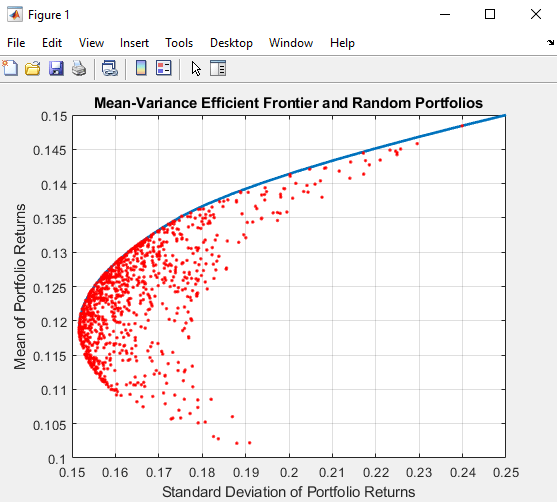

In [22]:
from IPython.display import Image
Image(filename='/content/portopt_efficient_frontier.png')

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.

But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [23]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
MARUTI.NS,0.313695
M&M.NS,0.317425
TATAMOTORS.NS,0.462686
BAJAJ-AUTO.NS,0.260932
HEROMOTOCO.NS,0.303701
EICHERMOT.NS,0.343142
BHARATFORG.NS,0.375139
BALKRISIND.NS,0.368046
ASHOKLEY.NS,0.445052
MRF.NS,0.274484


## Annual Return and Volatility of the Stocks

In [24]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MARUTI.NS,0.154123,0.313695
M&M.NS,0.088833,0.317425
TATAMOTORS.NS,-0.154617,0.462686
BAJAJ-AUTO.NS,0.083990,0.260932
HEROMOTOCO.NS,0.030054,0.303701
EICHERMOT.NS,0.061289,0.343142
BHARATFORG.NS,0.082577,0.375139
BALKRISIND.NS,0.410636,0.368046
ASHOKLEY.NS,0.076456,0.445052
MRF.NS,0.138809,0.274484


Tata Motors has the maximum risk attached. Maruti has the highest rate of return.

Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [25]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

In [26]:
num_assets = len(test.columns)
num_portfolios = 10000

In [27]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [28]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(test.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [29]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MARUTI.NS weight,M&M.NS weight,TATAMOTORS.NS weight,BAJAJ-AUTO.NS weight,HEROMOTOCO.NS weight,EICHERMOT.NS weight,BHARATFORG.NS weight,BALKRISIND.NS weight,ASHOKLEY.NS weight,MRF.NS weight
0,0.076221,0.235864,0.150294,0.182274,0.103148,0.137636,0.131204,0.091714,0.090524,0.035480,0.018346,0.059381
1,0.068737,0.244753,0.114172,0.154359,0.189585,0.165734,0.055660,0.064746,0.038853,0.068215,0.075012,0.073665
2,0.146019,0.248915,0.075667,0.168840,0.057684,0.019807,0.036616,0.117804,0.176422,0.225971,0.094444,0.026745
3,0.092164,0.244111,0.087337,0.123102,0.156657,0.007164,0.096440,0.147225,0.035443,0.122188,0.076829,0.147615
4,0.107502,0.238570,0.062014,0.129124,0.106286,0.048454,0.121361,0.096084,0.161731,0.147067,0.035222,0.092659


You can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give us the efficient frontier for our portfolio.

<Axes: xlabel='Volatility', ylabel='Returns'>

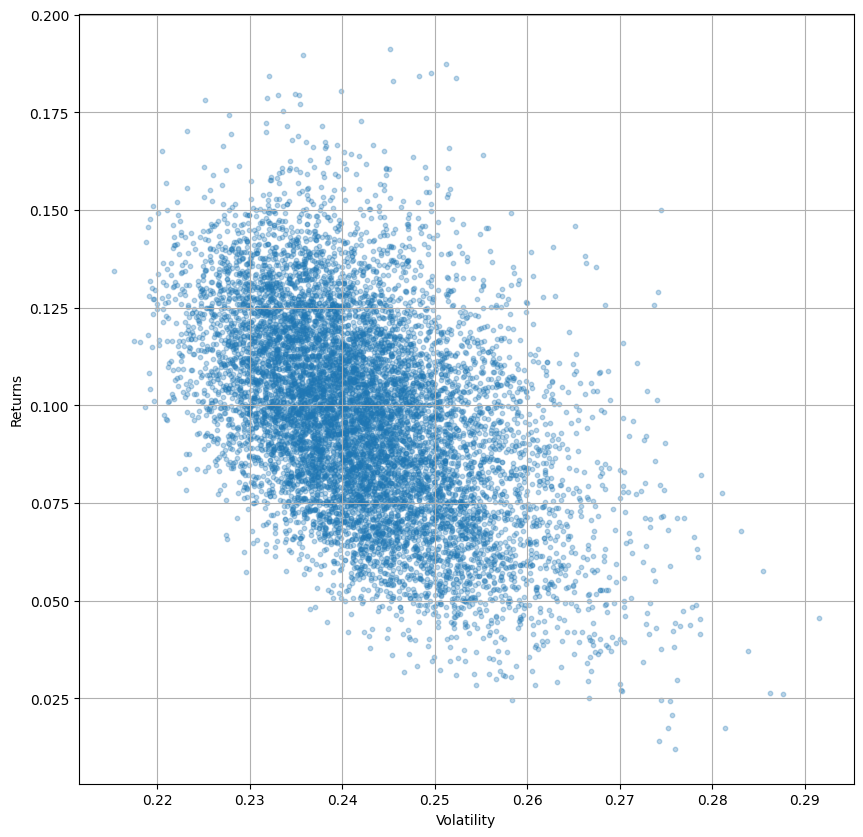

In [30]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

## How to Read the Efficient Frontier?

Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)


And everything in between.

## Minimum Risk Portfolio

In [31]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

,118
Returns,0.134310
Volatility,0.215355
MARUTI.NS weight,0.029374
M&M.NS weight,0.191134
TATAMOTORS.NS weight,0.036435
BAJAJ-AUTO.NS weight,0.247100
HEROMOTOCO.NS weight,0.040527
EICHERMOT.NS weight,0.051865
BHARATFORG.NS weight,0.012619
BALKRISIND.NS weight,0.140078


The minimum volatility is in a portfolio where the weights of Maruti Suzuki, Mahindra and Mahindra, Tata Motors, Bajaj Auto, and Hero MotoCorp are: 20.40%, 20.21%, 1.12%, 41.89%, and 16.37%, respectively. Portfolio return: 7.83%, Volatility: 22.92%.

This point can be plotted on the efficient frontier graph as shown:

<ipython-input-32-c9bdf9303a5f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


Text(0, 0.5, 'Return')

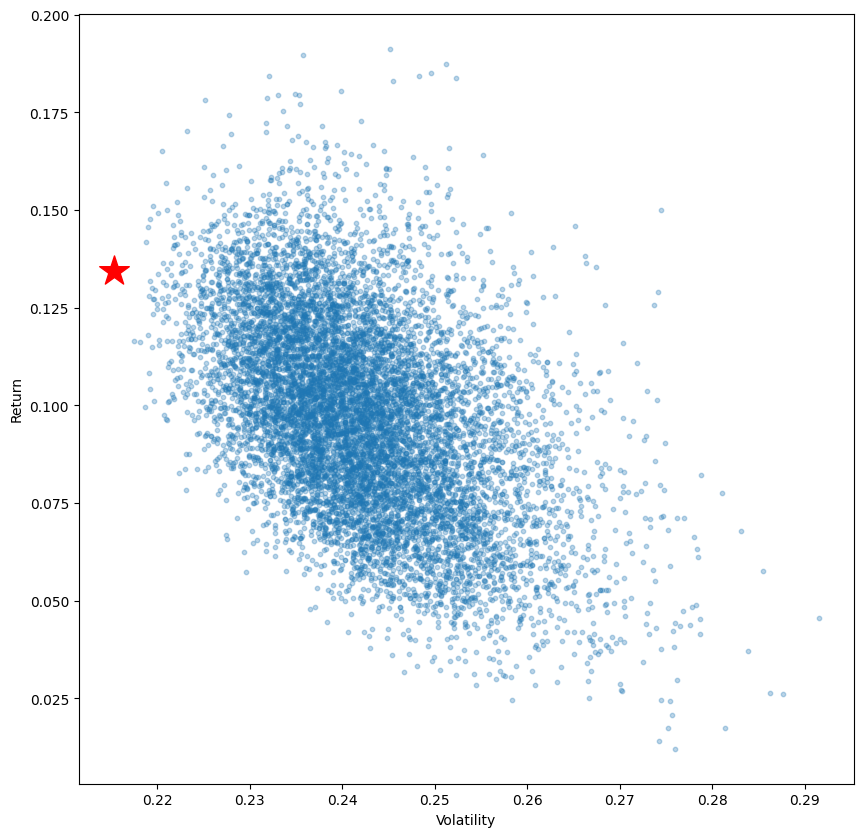

In [32]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.xlabel("Volatility")
plt.ylabel("Return")

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter called the Sharpe Ratio.

## Sharpe Ratio

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

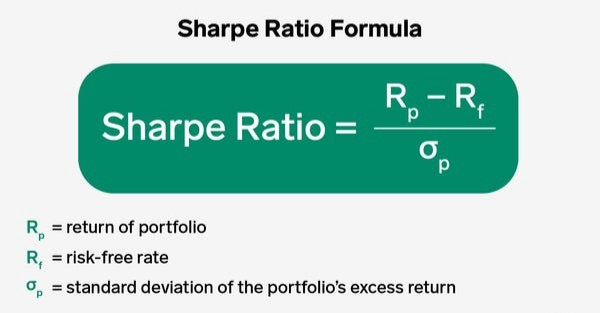

In [34]:
from IPython.display import Image
Image(filename='/content/sharpe_ratio.jpeg')

Below is the code for finding out portfolio with maximum Sharpe Ratio. This portfolio is the optimized portfolio that we wanted to find. We define the risk-free rate to be 1% or 0.01.

## Optimal Risky Portfolio

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [35]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

,1989
Returns,0.189720
Volatility,0.235777
MARUTI.NS weight,0.032203
M&M.NS weight,0.240304
TATAMOTORS.NS weight,0.027658
BAJAJ-AUTO.NS weight,0.061066
HEROMOTOCO.NS weight,0.033135
EICHERMOT.NS weight,0.003584
BHARATFORG.NS weight,0.085167
BALKRISIND.NS weight,0.307320


<ipython-input-36-5d853e1897b6>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
<ipython-input-36-5d853e1897b6>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)


Text(0, 0.5, 'Return')

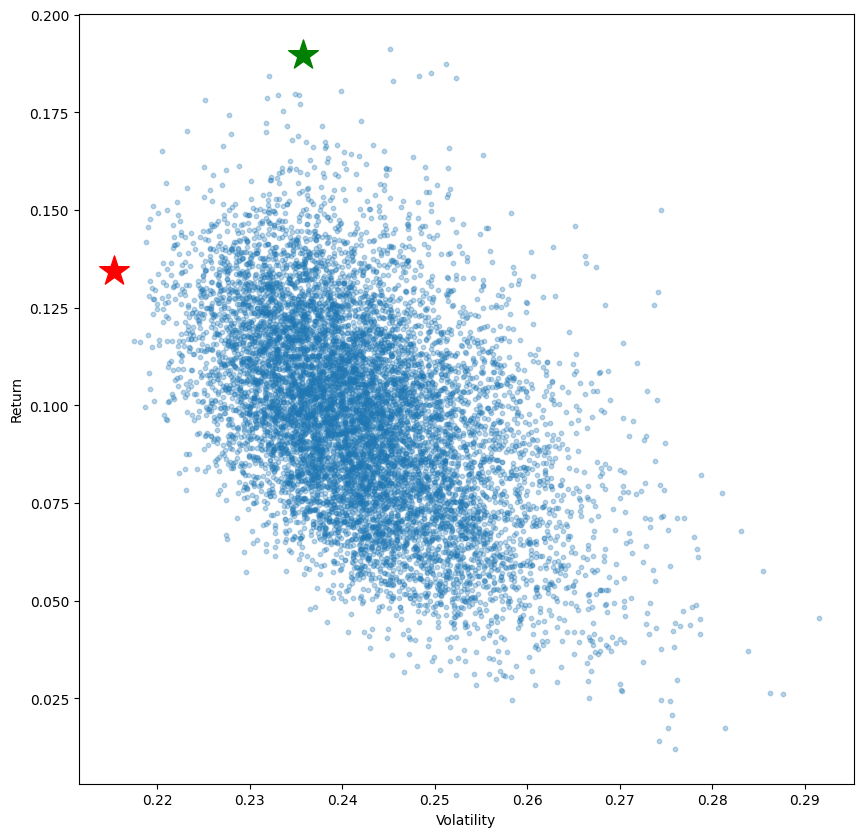

In [36]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.xlabel("Volatility")
plt.ylabel("Return")

The green star represents the optimal risky portfolio.

https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

#Performance Trends Of Major Auto Companies

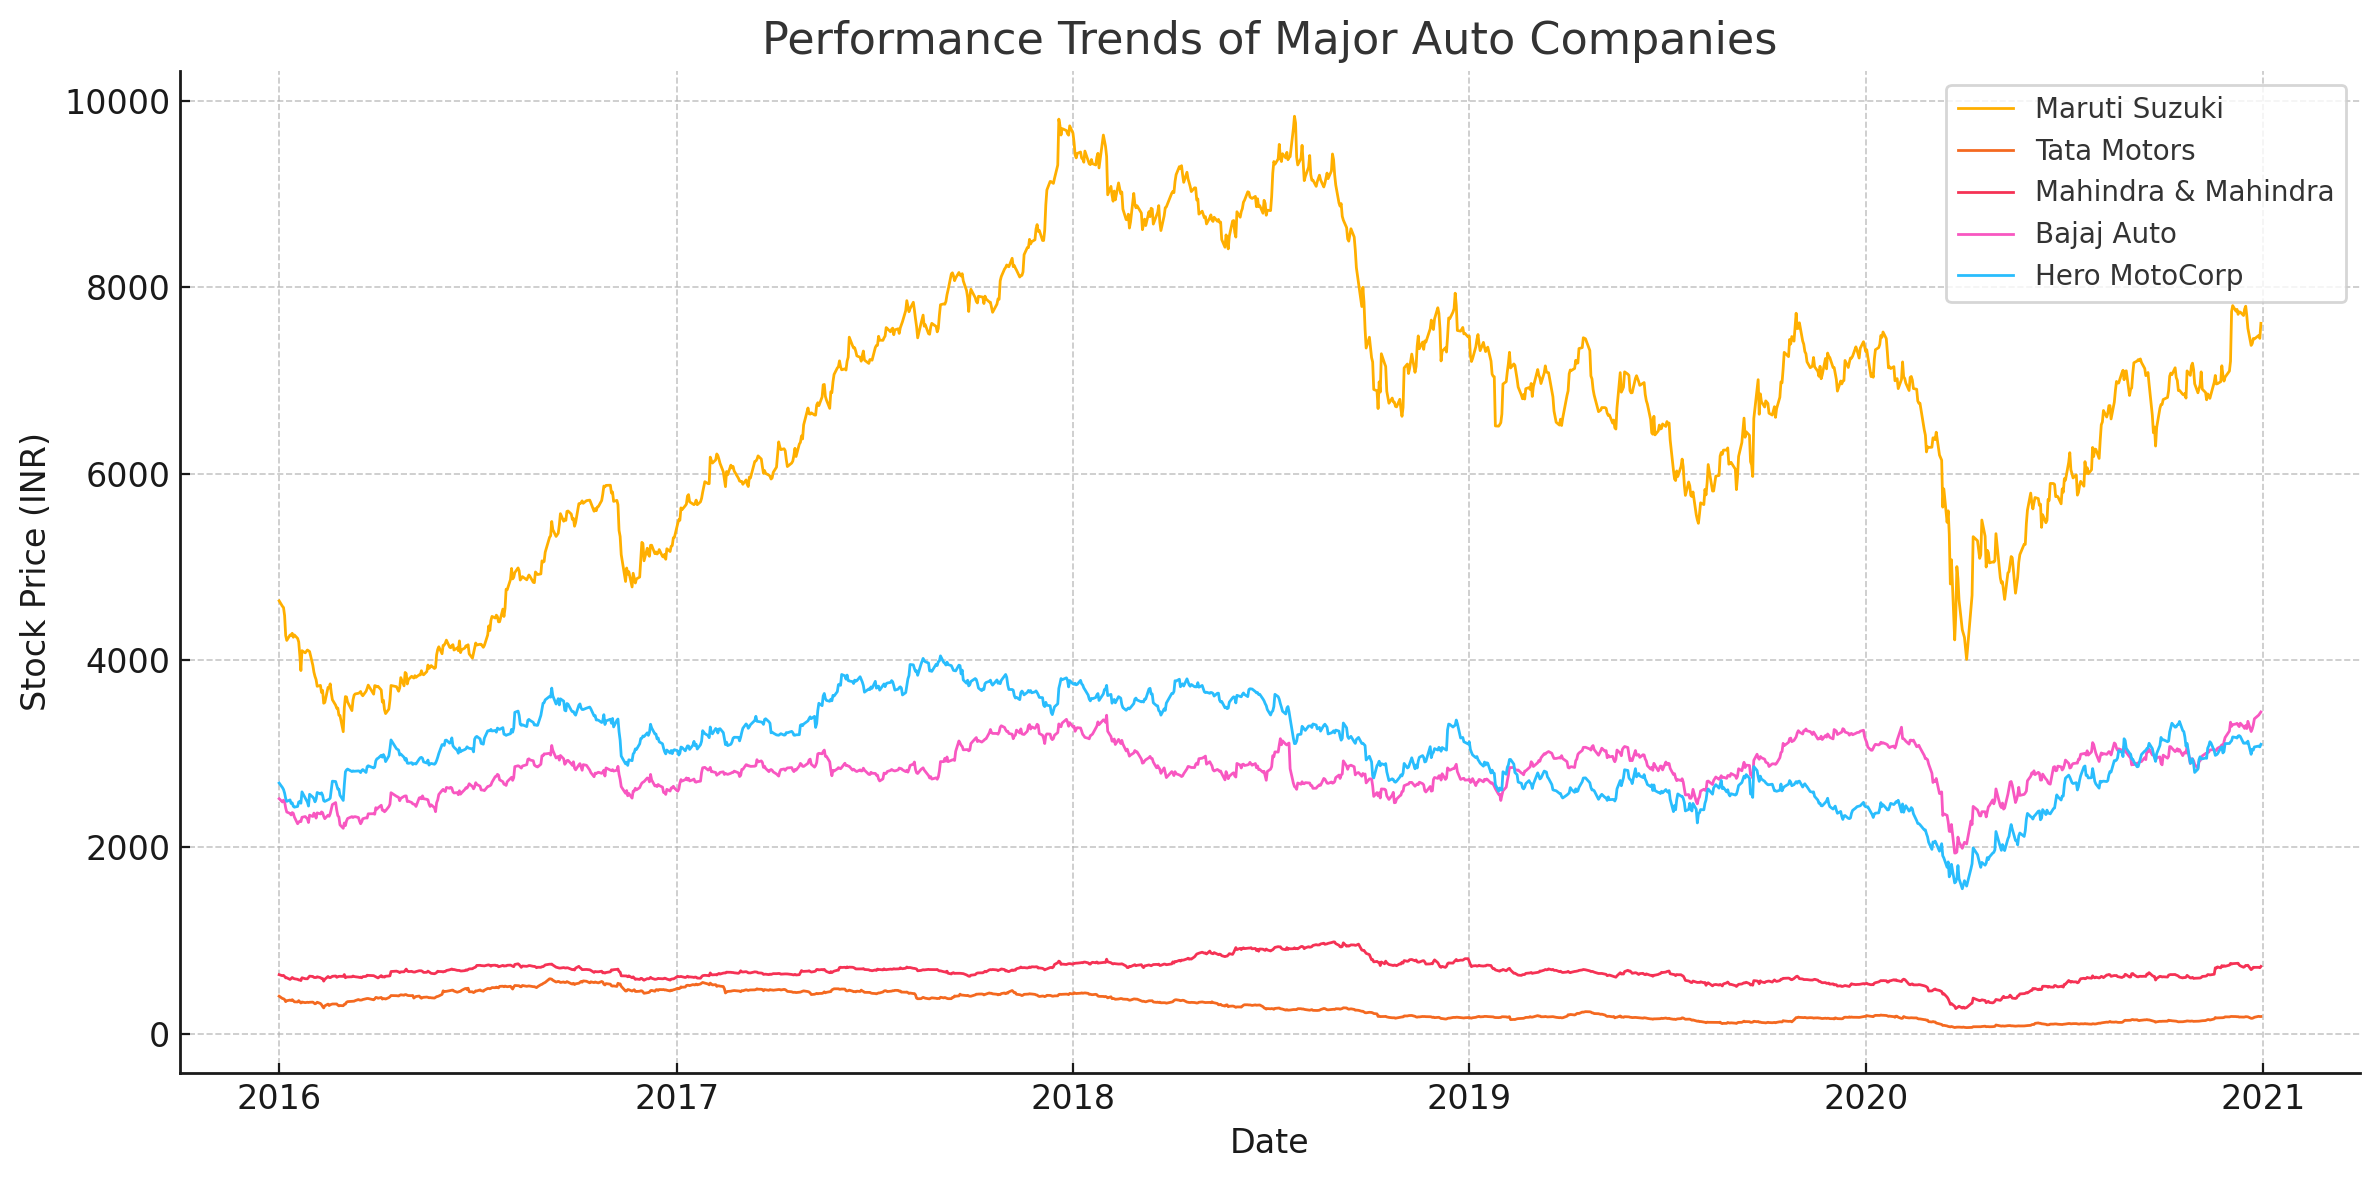

In [37]:
from IPython.display import Image
Image(filename='/content/output.png')

The chart above illustrates the performance trends of major auto companies in India, including Maruti Suzuki, Tata Motors, Mahindra & Mahindra, Bajaj Auto, and Hero MotoCorp, over time. It provides a visual representation of how their stock prices have fluctuated, showcasing the relative movements and trends among these companies. This can help in understanding market behavior and making informed investment decisions.

#Trend Analysis For MARUTI.NS

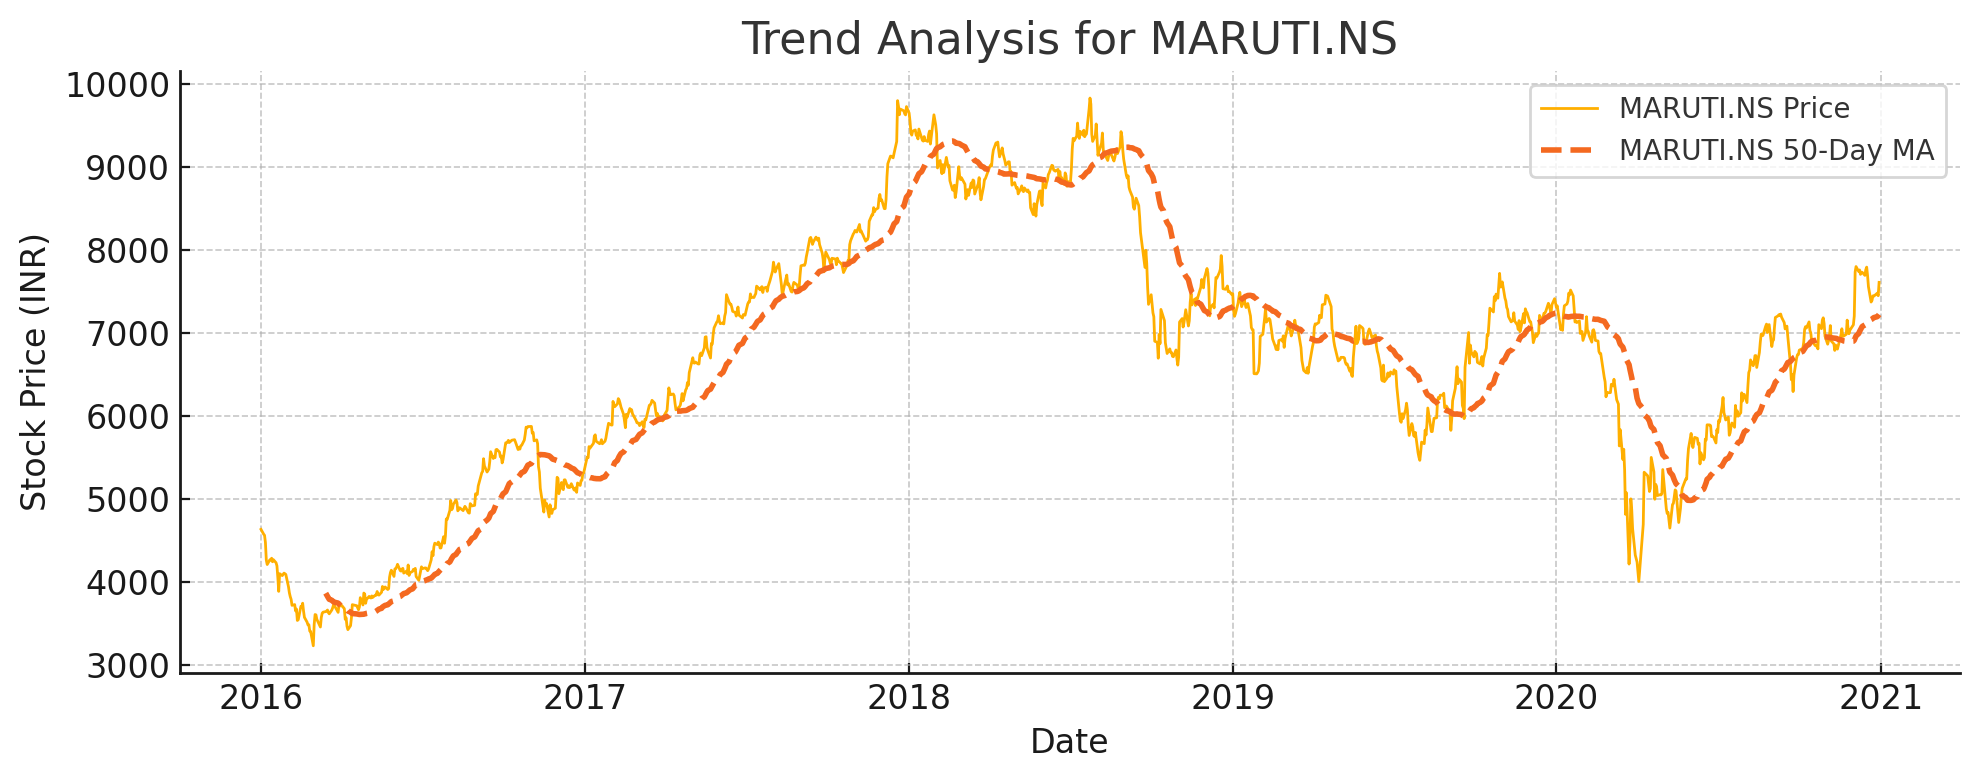

In [40]:
from IPython.display import Image
Image(filename='/content/output (1).png')

#Trend Analysis For TATAMOTORS.NS

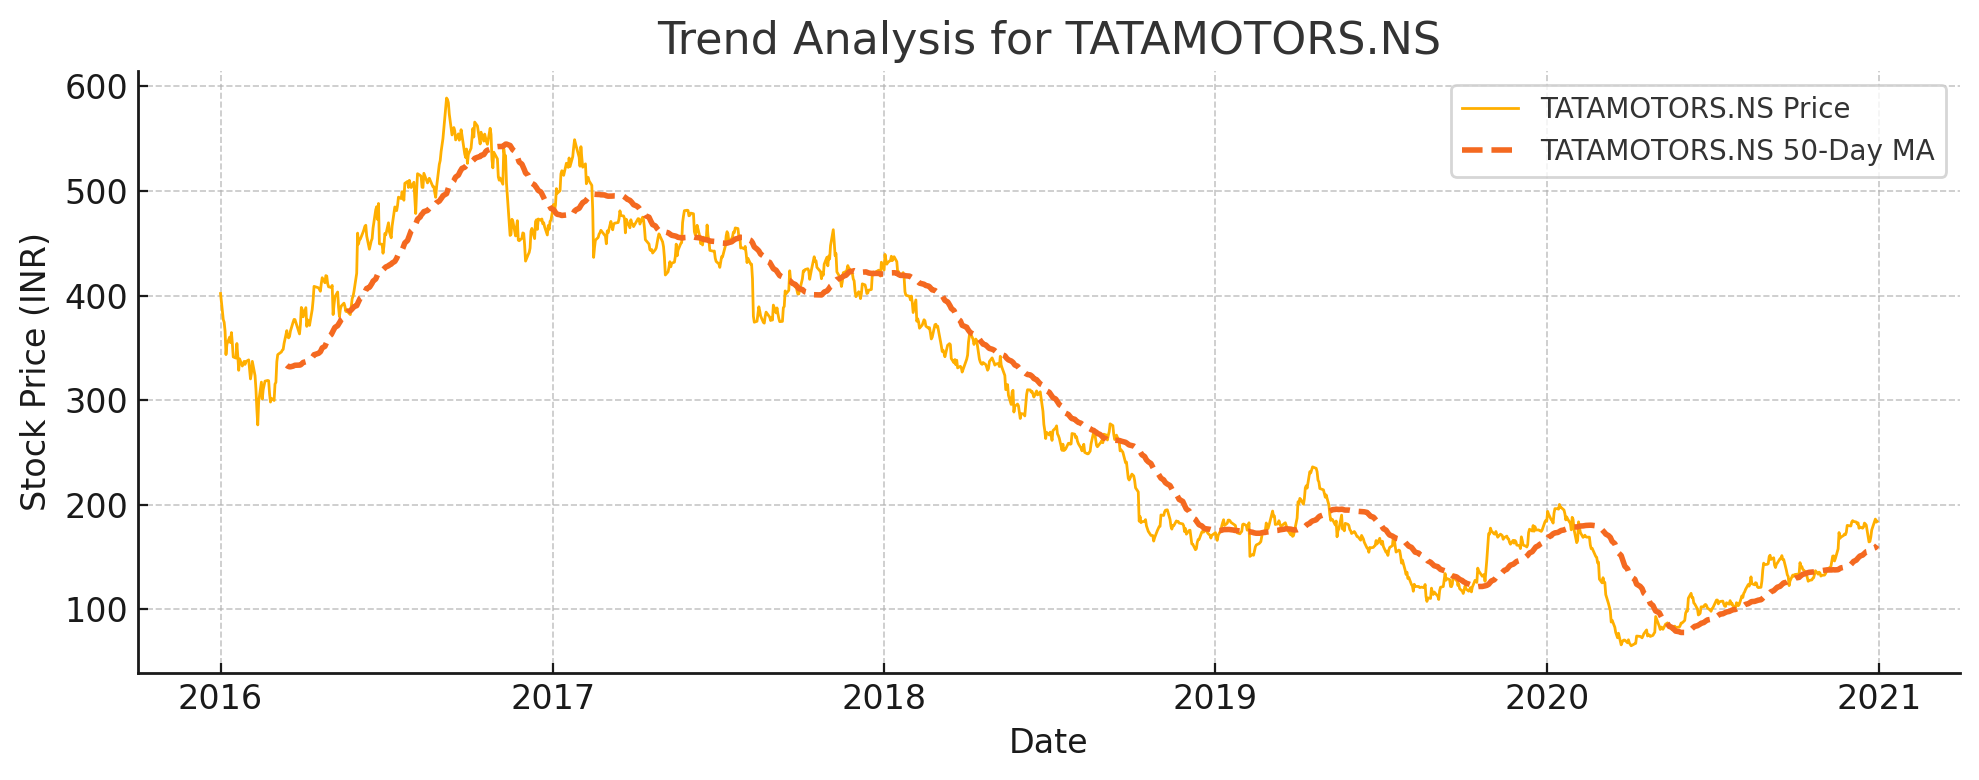

In [41]:
from IPython.display import Image
Image(filename='/content/output (2).png')

#Trend Analysis For M&M.NS

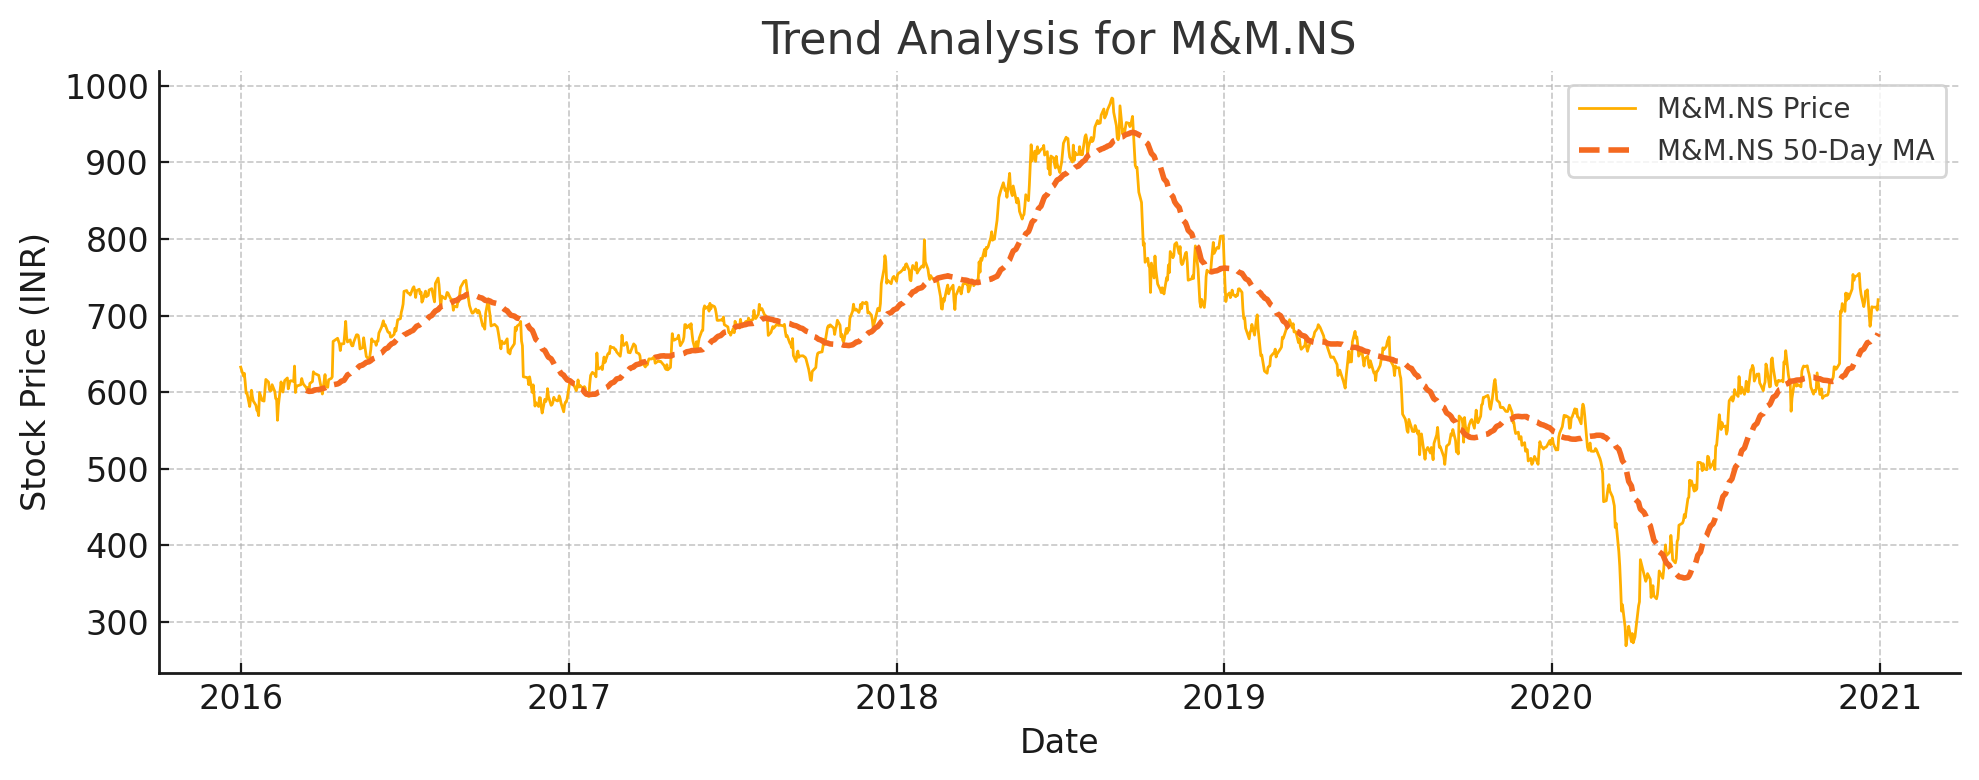

In [42]:
from IPython.display import Image
Image(filename='/content/output (3).png')

#Trend Analysis For BAJAJ-AUTO.NS

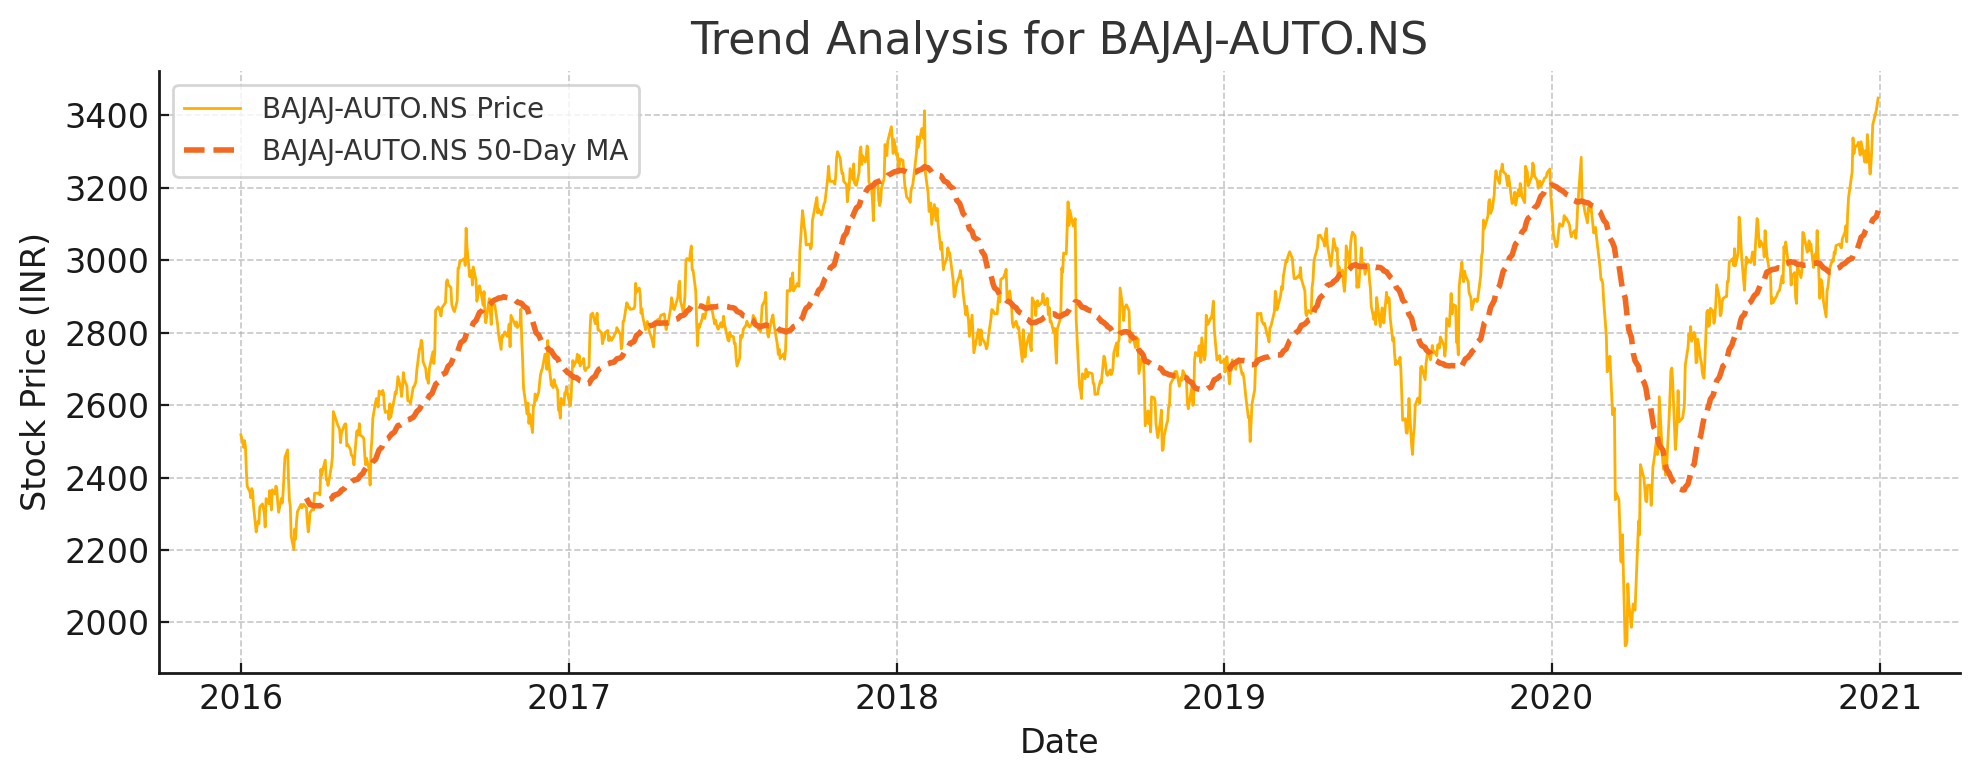

In [43]:
from IPython.display import Image
Image(filename='/content/output (4).png')

#Trend Analysis For HEROMOTOCO.NS

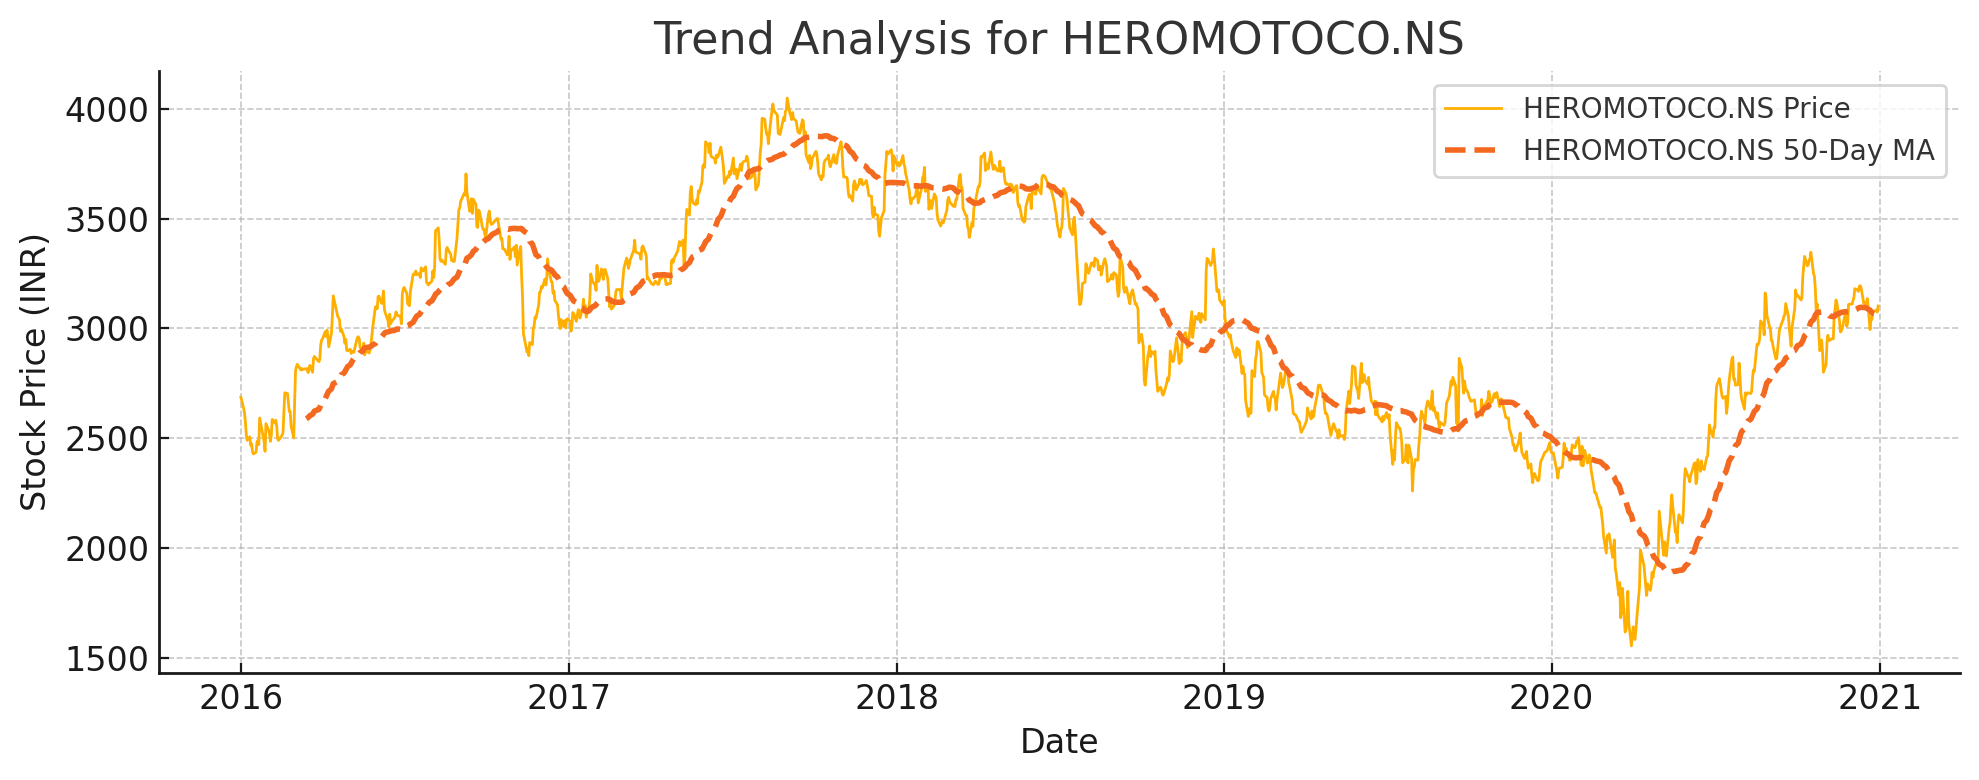

In [44]:
from IPython.display import Image
Image(filename='/content/output (5).png')

The charts above show trend analyses for each major auto company stock. Each chart includes the actual stock price and its 50-day moving average (MA), which helps to smooth out short-term fluctuations and highlight longer-term trends. These visualizations can aid in identifying the overall market direction and potential buy or sell signals based on the stock's movement relative to its moving average